<a href="https://colab.research.google.com/github/mrcryptsie/Classification_cat_dog/blob/main/Classification_chient_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification d'images Chat contre Chien
## Exercice 1 : Construction d'un Convnet à partir de zéro
**_Temps estimé pour la réalisation : 20 minutes_**

Dans cet exercice, nous allons construire un modèle de classification à partir de zéro qui sera capable de distinguer les chiens des chats. Nous allons suivre ces étapes :

1. Explorer les données d'exemple
2. Construire un petit convnet à partir de zéro pour résoudre notre problème de classification
3. Évaluer la précision de l'entraînement et de la validation

C'est parti !

## Exploration des données

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-08-23 16:06:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.213.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   174MB/s    in 0.4s    

2023-08-23 16:06:16 (174 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Voir alors une petite liste de nos données
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])


['cat.432.jpg', 'cat.800.jpg', 'cat.683.jpg', 'cat.550.jpg', 'cat.227.jpg', 'cat.191.jpg', 'cat.915.jpg', 'cat.266.jpg', 'cat.151.jpg', 'cat.846.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


#Nous allons essayer de visualiser nos images

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paramètre de notre graphe avec une configuration de 4*4
nrows = 4
ncols = 4

# Index
pic_index = 0

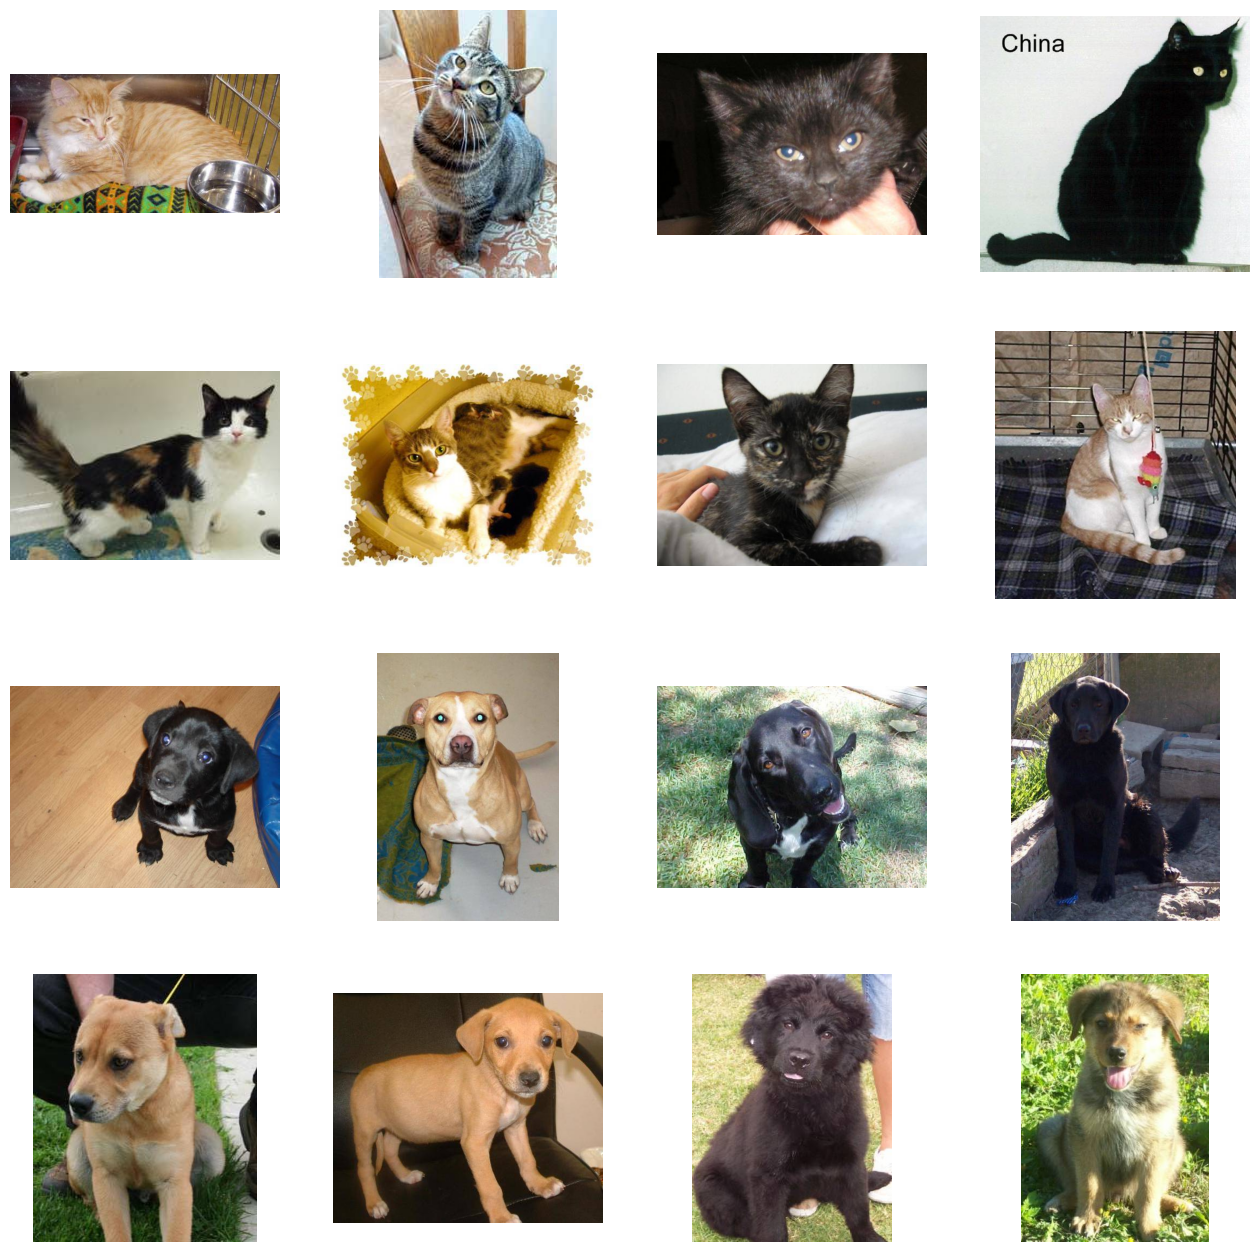

In [ ]:
# Alors passé à la visualisation
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
               for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                 for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Temps de la mise en place du modèle et de son entrainement

In [ ]:
# Importation des modules nécessaire
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Données d'entrées
# Entrée des données de types 150*150 de pixels et de couleurs RGB d'ou le trois
######### MA QUESTION #################
#===== Pourquoi 150*150 et non 250*250 ou 300*400 ou n'importe quoi. Qu'est ce qui justifie ce choix
# que fait réellement cette couche d'entrée à part recevoir les données en entrée
img_input = layers.Input(shape=(150, 150, 3))
# Même questions
# Première réseaux convolutives extraites avec 16 filtres et de type 3*3
# Après application des 16 couches aux données de type 2*2
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Seconde convolutions à 32 filtres
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Dernière convolutions ) 64 filtres
x = layers.Conv2D(64, 3, activation ='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Application du Flatten pour retrécir les données et avoir quelques choses de plus plats
x = layers.Flatten()(x)

# Créer à présent la couche dense
x = layers.Dense(512, activation = 'relu')(x)

# Créer enfin la sortie et faire passer alors nos données par une fonction d'activation sigmoid
output = layers.Dense(1, activation='sigmoid')(x)

# Créer le model
model = Model(img_input, output)

In [ ]:
# Résumé de notre modèle
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)        18496 

Toutes nos paramètres de grâce sont entrainable

In [ ]:
# Alors passé à la compilation
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Nous devons rédimensionnés toutes nos images avant de passé à l'nentrainement de notre modèle
# Le but ici dans cas est de travaillé la dimensions de nos données et quelles revienne entre O et 1

# Les données d'entrainement
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Normalisation des données d'entrainement
train_generator  = train_datagen.flow_from_directory(
    train_dir, # Sources des renseignements des données
    target_size = (150,150),  # Toutes les images
    batch_size = 20,
    class_mode = 'binary'
)

# Normalisation des données de validation
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Alors place réellement à l'entrainement de nos données
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose = 2
)

<ipython-input-22-e3d7a9254ca6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
100/100 - 73s - loss: 0.7994 - acc: 0.5370 - val_loss: 0.6822 - val_acc: 0.6840 - 73s/epoch - 726ms/step
Epoch 2/15
100/100 - 75s - loss: 0.6640 - acc: 0.6165 - val_loss: 0.6133 - val_acc: 0.6800 - 75s/epoch - 747ms/step
Epoch 3/15
100/100 - 70s - loss: 0.5937 - acc: 0.6920 - val_loss: 0.5738 - val_acc: 0.6980 - 70s/epoch - 702ms/step
Epoch 4/15
100/100 - 90s - loss: 0.5259 - acc: 0.7365 - val_loss: 0.5611 - val_acc: 0.7080 - 90s/epoch - 902ms/step
Epoch 5/15
100/100 - 71s - loss: 0.4745 - acc: 0.7670 - val_loss: 0.5417 - val_acc: 0.7330 - 71s/epoch - 714ms/step
Epoch 6/15
100/100 - 88s - loss: 0.3889 - acc: 0.8240 - val_loss: 0.5726 - val_acc: 0.7360 - 88s/epoch - 881ms/step
Epoch 7/15
100/100 - 74s - loss: 0.2994 - acc: 0.8700 - val_loss: 0.6294 - val_acc: 0.7270 - 74s/epoch - 738ms/step
Epoch 8/15
100/100 - 73s - loss: 0.2301 - acc: 0.9070 - val_loss: 0.9788 - val_acc: 0.6500 - 73s/epoch - 726ms/step
Epoch 9/15
100/100 - 76s - loss: 0.1488 - acc: 0.9425 - val_loss: 0.8035

### Visualisation des Représentations Intermédiaires

Pour avoir une idée des types de caractéristiques que notre Convnet a apprises, une chose intéressante à faire est de visualiser comment une entrée est transformée lorsqu'elle traverse le Convnet.

Choisissons une image aléatoire de chat ou de chien dans l'ensemble d'entraînement, puis générer une figure où chaque ligne représente la sortie d'une couche, et chaque image dans la ligne est un filtre spécifique dans cette carte de caractéristiques de sortie. Exécutez à nouveau cette cellule pour générer des représentations intermédiaires pour différentes images d'entraînement.

1/1 [==============================] - 0s 271ms/step


<ipython-input-23-3c74e9910012>:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


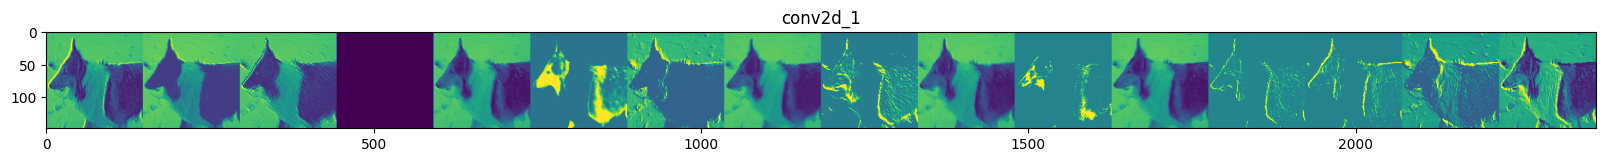

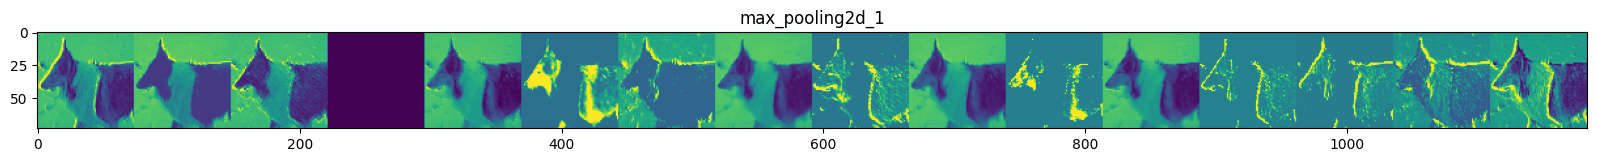

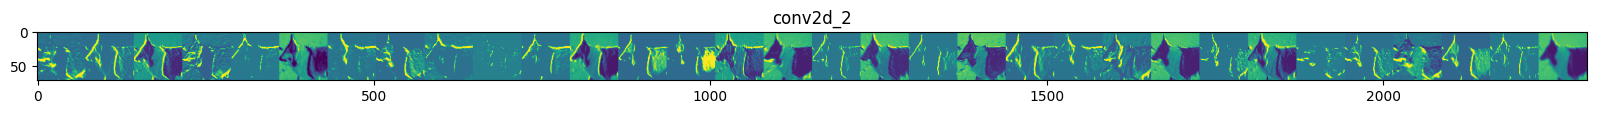

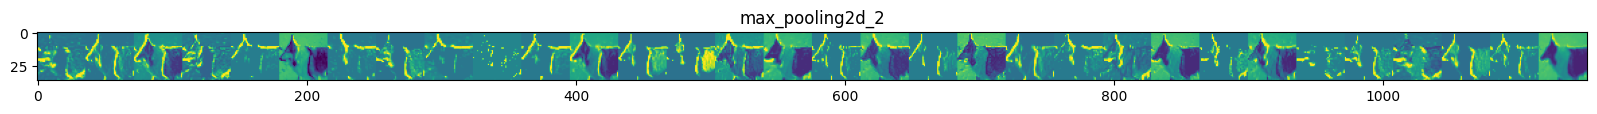

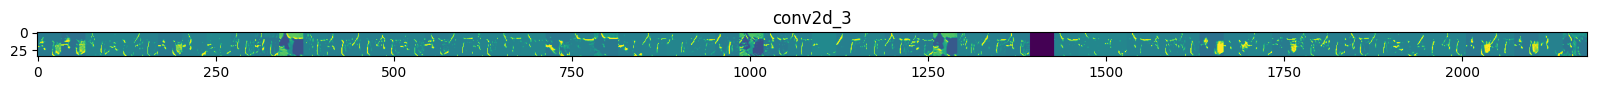

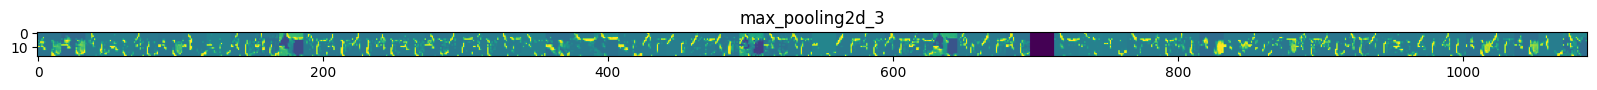

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Entrainement des données de validation et de perte')

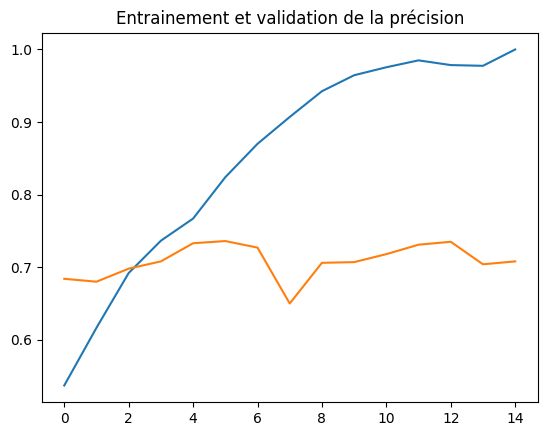

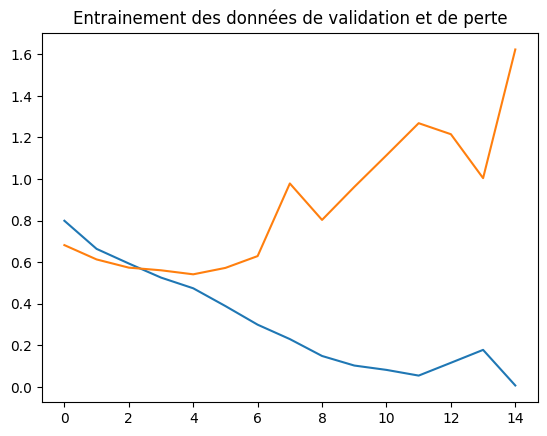

In [ ]:
# Voir maintenant les courbes de précisions
acc = history.history['acc']
val_acc = history.history['val_acc']



loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


# Affichage des graphiques d'entrainements et de validations par épochs
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Entrainement et validation de la précision")
plt.figure()


# Affichage des graphiques de pertes par epochs
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Entrainement des données de validation et de perte')

